# **IMPORTING LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.stem.wordnet import WordNetLemmatizer
import string
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', 255)

READING THE DATASET BY PANDAS

In [3]:
df = pd.read_csv("/content/sentiment.csv", encoding='latin1')
test = pd.read_csv("/content/sentiment.csv", encoding='latin1')

HEAD PRINTING FIRST FIVE COLUMNS

In [5]:
df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -- skyscrapers galore). Good tweeps in China: (SH) (BJ).,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to quit her company, such a shame!",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


In [6]:
df = pd.concat([df,test])


In [7]:
df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -- skyscrapers galore). Good tweeps in China: (SH) (BJ).,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to quit her company, such a shame!",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0


FOR ROWS AND COLUMNS

In [8]:
df.shape

(9630, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9630 entries, 0 to 4814
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            7068 non-null   object 
 1   text              7068 non-null   object 
 2   sentiment         7068 non-null   object 
 3   Time of Tweet     7068 non-null   object 
 4   Age of User       7068 non-null   object 
 5   Country           7068 non-null   object 
 6   Population -2020  7068 non-null   float64
 7   Land Area (Km²)   7068 non-null   float64
 8   Density (P/Km²)   7068 non-null   float64
dtypes: float64(3), object(6)
memory usage: 752.3+ KB


In [12]:
# Checking the unique values of sentiment column
df['sentiment'].value_counts()

,count
sentiment,
neutral,2860
positive,2206
negative,2002


In [13]:
df.isnull().sum()


,0
textID,2562
text,2562
sentiment,2562
Time of Tweet,2562
Age of User,2562
Country,2562
Population -2020,2562
Land Area (Km²),2562
Density (P/Km²),2562


In [14]:
df.dropna(inplace=True)


FOR DUBLICATED VALUES

In [15]:
df.duplicated().sum()


3534

In [16]:
df.head(3)

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -- skyscrapers galore). Good tweeps in China: (SH) (BJ).,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to quit her company, such a shame!",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0


In [17]:
def remove_tags(raw_text):
    cleaned_text = re.sub(re.compile('<.*?>'), '', str(raw_text))
    return cleaned_text

In [18]:
df['cleaned_text'] = df['text'].apply(remove_tags)


In [19]:
df.head(3)

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),cleaned_text
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0,Last session of the day http://twitpic.com/67ezh
1,96d74cb729,Shanghai is also really exciting (precisely -- skyscrapers galore). Good tweeps in China: (SH) (BJ).,positive,noon,21-30,Albania,2877797.0,27400.0,105.0,Shanghai is also really exciting (precisely -- skyscrapers galore). Good tweeps in China: (SH) (BJ).
2,eee518ae67,"Recession hit Veronique Branquinho, she has to quit her company, such a shame!",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0,"Recession hit Veronique Branquinho, she has to quit her company, such a shame!"


In [20]:
df['cleaned_text'] = df['text'].apply(lambda x:str(x).lower())


In [21]:
df.head(3)

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),cleaned_text
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0,last session of the day http://twitpic.com/67ezh
1,96d74cb729,Shanghai is also really exciting (precisely -- skyscrapers galore). Good tweeps in China: (SH) (BJ).,positive,noon,21-30,Albania,2877797.0,27400.0,105.0,shanghai is also really exciting (precisely -- skyscrapers galore). good tweeps in china: (sh) (bj).
2,eee518ae67,"Recession hit Veronique Branquinho, she has to quit her company, such a shame!",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0,"recession hit veronique branquinho, she has to quit her company, such a shame!"


UNNECESSARY CHARACTERS REMOVAL

In [22]:
def remove_unnecessary_characters(text):
    text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text))
    text = re.sub(r'\s+', ' ', str(text)).strip()
    return text

In [23]:
df['cleaned_text'] = df['text'].apply(remove_unnecessary_characters)


In [24]:
df.head(3)

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),cleaned_text
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0,Last session of the day httptwitpiccom67ezh
1,96d74cb729,Shanghai is also really exciting (precisely -- skyscrapers galore). Good tweeps in China: (SH) (BJ).,positive,noon,21-30,Albania,2877797.0,27400.0,105.0,Shanghai is also really exciting precisely skyscrapers galore Good tweeps in China SH BJ
2,eee518ae67,"Recession hit Veronique Branquinho, she has to quit her company, such a shame!",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0,Recession hit Veronique Branquinho she has to quit her company such a shame


In [25]:
def normalize_text(text):
    if isinstance(text, str):
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
    else:
        text = str(text)
    return text
df['cleaned_text'] = df['text'].apply(normalize_text)

In [26]:
df.head(3)

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),cleaned_text
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0,Last session of the day httptwitpiccom67ezh
1,96d74cb729,Shanghai is also really exciting (precisely -- skyscrapers galore). Good tweeps in China: (SH) (BJ).,positive,noon,21-30,Albania,2877797.0,27400.0,105.0,Shanghai is also really exciting precisely skyscrapers galore Good tweeps in China SH BJ
2,eee518ae67,"Recession hit Veronique Branquinho, she has to quit her company, such a shame!",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0,Recession hit Veronique Branquinho she has to quit her company such a shame


NLTK FROM NLP REMOVES THE STOP WORDS LIKE OR, AND, THE ETC

In [27]:
from nltk.corpus import stopwords
import nltk

nltk.download('stopwords')
sw_list = stopwords.words('english')

df['cleaned_text'] = df['text'].apply(lambda x: [item for item in x.split() if item not in sw_list]).apply(lambda x:" ".join(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [28]:
df.tail(3)

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),cleaned_text
3531,6332da480c,I know what you mean. My little dog is sinking into depression... he wants to move someplace tropical,negative,morning,46-60,Nigeria,206139589.0,910770.0,226.0,I know mean. My little dog sinking depression... wants move someplace tropical
3532,df1baec676,_sutra what is your next youtube video gonna be about? I love your videos!,positive,noon,60-70,North Korea,25778816.0,120410.0,214.0,_sutra next youtube video gonna about? I love videos!
3533,469e15c5a8,http://twitpic.com/4woj2 - omgssh ang cute ng bby.!,positive,night,70-100,North Macedonia,2083374.0,25220.0,83.0,http://twitpic.com/4woj2 - omgssh ang cute ng bby.!


FOR THE REMOVAL OF THE URLS

In [29]:
def remove_urls(text):
    pattern = re.compile(r'https?://\S+|www\.\S+')
    pattern = re.compile(r'http?://\S+|www\.\S+')
    return pattern.sub(r'', text)

In [30]:
df['cleaned_text'] = df['text'].apply(remove_urls)


In [31]:
df.head(3)

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),cleaned_text
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0,Last session of the day
1,96d74cb729,Shanghai is also really exciting (precisely -- skyscrapers galore). Good tweeps in China: (SH) (BJ).,positive,noon,21-30,Albania,2877797.0,27400.0,105.0,Shanghai is also really exciting (precisely -- skyscrapers galore). Good tweeps in China: (SH) (BJ).
2,eee518ae67,"Recession hit Veronique Branquinho, she has to quit her company, such a shame!",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0,"Recession hit Veronique Branquinho, she has to quit her company, such a shame!"


In [32]:
exclude = string.punctuation
exclude

def remove_punc1(text):
    return text.translate(str.maketrans('', '', exclude))

In [33]:
df['cleaned_text'] = df['text'].apply(remove_punc1)


In [35]:
df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),cleaned_text
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0,Last session of the day httptwitpiccom67ezh
1,96d74cb729,Shanghai is also really exciting (precisely -- skyscrapers galore). Good tweeps in China: (SH) (BJ).,positive,noon,21-30,Albania,2877797.0,27400.0,105.0,Shanghai is also really exciting precisely skyscrapers galore Good tweeps in China SH BJ
2,eee518ae67,"Recession hit Veronique Branquinho, she has to quit her company, such a shame!",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0,Recession hit Veronique Branquinho she has to quit her company such a shame
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0,happy bday
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0,httptwitpiccom4w75p I like it


In [36]:
X = df['cleaned_text']
y = df['sentiment']

Label encoding is used to convert categorical data into numerical form

In [37]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

y = encoder.fit_transform(y)
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

NLP TECHNIQUE FOR TRANSFORMING TEXT TO BAG OF WORDS

In [38]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
X_train_bow = cv.fit_transform(X_train).toarray()
X_test_bow = cv.transform(X_test).toarray()

USED DIFFERENT MODELS FOR BETTER ACCURACY

In [39]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train_bow,y_train)

GaussianNB()

In [40]:
y_pred = gnb.predict(X_test_bow)


In [41]:
from sklearn.metrics import accuracy_score,classification_report, ConfusionMatrixDisplay
score_lr = accuracy_score(y_test, y_pred)
score_lr

0.7793493635077794

In [42]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(n_jobs=-1)
lr.fit(X_train_bow,y_train)

LogisticRegression(n_jobs=-1)

In [43]:
y_pred = lr.predict(X_test_bow)
from sklearn.metrics import accuracy_score,classification_report, ConfusionMatrixDisplay
score_lr = accuracy_score(y_test, y_pred)
score_lr

0.9073550212164073

In [44]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
rfc.fit(X_train_bow, y_train)

RandomForestClassifier(random_state=0)

In [45]:
pred_rfc = rfc.predict(X_test_bow)
score_rfc = rfc.score(X_test_bow, y_test)
score_rfc

0.9434229137199435

In [46]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.87      0.91       417
           1       0.86      0.95      0.90       540
           2       0.95      0.89      0.92       457

    accuracy                           0.91      1414
   macro avg       0.92      0.90      0.91      1414
weighted avg       0.91      0.91      0.91      1414



CONFUSION MATRIX

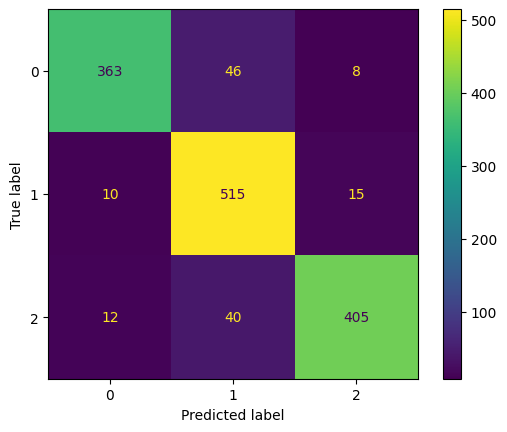

In [47]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred);


In [48]:
def wp(text):
    return text.upper()

def output_lable(n):
    if n == 0:
        return "The Text Sentement is Negative"
    elif n == 1:
        return "The Text Sentement is Neutral"
    elif n == 2:
        return "The Text Sentement is Positive"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wp)
    new_x_test = new_def_test["text"]
    new_xv_test = cv.transform(new_x_test)
    pred_lr = lr.predict(new_xv_test)
    pred_rfc = rfc.predict(new_xv_test)

    return print((output_lable(pred_lr)))

MANUAL TEST THE TEXT WITH IT'S SENTIMENT

In [49]:
text = "I am very Happy "
manual_testing(text)

The Text Sentement is Positive
